# Medical Cost Personal Dataset
**Columns**

**age**: age of primary beneficiary

**sex**: insurance contractor gender: female, male

**bmi**: bmi is defined as the body mass divided by the square of the body height, and is universally expressed in units of kg/m², resulting from mass in kilograms and height in metres

**children**: Number of children covered by health insurance / Number of dependents

**smoker**: Smoking

**region**: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

**charges**: Individual medical costs billed by health insurance

In notebook I am trying determine predictive variables by analysing the dataset visualy

In [1]:
import numpy as np # linear algebra
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/Users/raufsafarov/Downloads/insurance.csv')

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Data Wrangling
#### What is the purpose of Data Wrangling?
Data Wrangling is the process of converting data from the initial format to a format that may be better for analysis.

In [4]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [5]:
# Looking for nomber of missing value in each column
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

So we dont have any missing value.

In [6]:
#Calculate the average of the column
#Lets calculate average of age.
avg_age = df['age'].mean()
avg_age

39.20702541106129

In [7]:
#Replace NaN by mean value
df['age'].replace(np.nan, avg_age, inplace=True)

In [8]:
# Lets check how many regions we have
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [9]:
#df['region'] = df.region you can use both 
df.region.value_counts()

southeast    364
northwest    325
southwest    325
northeast    324
Name: region, dtype: int64

In [10]:
df['age'].value_counts().sort_values(ascending=False)
#as we can see 18 and 19 years old people are in the majority

18    69
19    68
51    29
45    29
46    29
47    29
48    29
50    29
52    29
20    29
49    28
28    28
27    28
21    28
22    28
23    28
26    28
24    28
25    28
53    28
54    28
29    27
31    27
30    27
43    27
44    27
40    27
42    27
41    27
55    26
33    26
32    26
56    26
34    26
57    26
59    25
58    25
39    25
38    25
35    25
36    25
37    25
60    23
61    23
62    23
63    23
64    22
Name: age, dtype: int64

In [11]:
df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

### Lets convert data types to proper format



In [12]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [13]:
#We will use numerical data, so we should convert 'sex','smoker' amd 'region' to numerical data
# Encoding the data with map function

df['sex'] = df['sex'].map({'female':0,'male':1})
df['smoker'] = df['smoker'].map({'yes':1,'no':0})
df['region'] = df['region'].map({'southeast':0,'southwest':1,'northwest':2,'northeast':3})

In [14]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,1,16884.92400
1,18,1,33.770,1,0,0,1725.55230
2,28,1,33.000,3,0,0,4449.46200
3,33,1,22.705,0,0,2,21984.47061
4,32,1,28.880,0,0,2,3866.85520


## Linear Regression

As we can see all is numeric data now.

In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
sex,1338.0,0.505232,0.500160,0.0000,0.00000,1.000,1.000000,1.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
smoker,1338.0,0.204783,0.403694,0.0000,0.00000,0.000,0.000000,1.00000
region,1338.0,1.455157,1.130197,0.0000,0.00000,1.000,2.000000,3.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


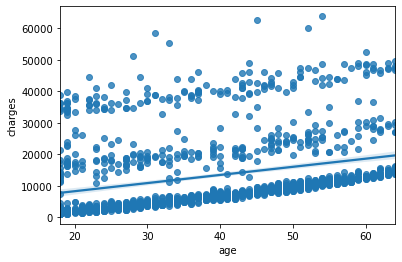

In [16]:
sns.regplot(x ='age', y = 'charges', data =df)
# Weak Linear Relationship

In [17]:
df['region'].value_counts()

0    364
2    325
1    325
3    324
Name: region, dtype: int64

In [18]:
#Let's repeat the above steps but save the results to the dataframe "region_value_counts" and rename the column 
#'region' to 'value_counts'.
region_value_counts = df['region'].value_counts().to_frame()
region_value_counts.rename(columns={'region': 'value_counts'}, inplace=True)
region_value_counts

,value_counts
0,364
2,325
1,325
3,324


In [19]:
smoker_value_counts = df['smoker'].value_counts().to_frame()
smoker_value_counts.rename(columns ={'smoker': 'value_counts'},inplace =True)
smoker_value_counts

,value_counts
0,1064
1,274


In [20]:
smoker_value_counts.index.name = 'Smoker'

In [21]:
smoker_value_counts

,value_counts
Smoker,
0,1064
1,274


# Basic Grouping

In [22]:
df['age'].unique()

array([19, 18, 28, 33, 32, 31, 46, 37, 60, 25, 62, 23, 56, 27, 52, 30, 34,
       59, 63, 55, 22, 26, 35, 24, 41, 38, 36, 21, 48, 40, 58, 53, 43, 64,
       20, 61, 44, 57, 29, 45, 54, 49, 47, 51, 42, 50, 39])

In [23]:
#If we want to know, on average, which age_group and 'sex'  are charged more,
df_group_one = df[['age','sex','charges']]

In [24]:
df_group_one = df_group_one.groupby(['age','sex'], as_index =False).mean()

In [25]:
df_group_one

,age,sex,charges
0,18,0,6522.257919
1,18,1,7603.180557
2,19,0,9611.799484
3,19,1,9876.241479
4,20,0,7351.917571
...,...,...,...
89,62,1,21843.286953
90,63,0,22345.556404
91,63,1,17200.753432
92,64,0,23493.178700


This grouped data is much easier to visualize when it is made into a pivot table.



In [26]:
group_pivot = df_group_one.pivot(index = 'age',columns = 'sex')

In [27]:
group_pivot.T

age                   18           19            20           21  \
        sex                                                        
charges 0    6522.257919  9611.799484   7351.917571  5350.394655   
        1    7603.180557  9876.241479  12780.292557  4193.191381   

age                    22            23            24            25  \
        sex                                                           
charges 0     7635.835562  18590.470551   6569.819790   7993.993028   
        1    12073.083743   6249.169528  14726.212134  11436.821289   

age                   26            27  ...            55            56  \
        sex                             ...                               
charges 0    6013.517349  13961.746882  ...  16083.465636  11754.916000   
        1    6238.092207  10407.656561  ...  16245.625341  18296.115673   

age                    57            58            59            60  \
        sex                                                           
charges 0    16710.001224  13185.958395  19974.849426  17307.327752   
        1    16184.369276  14629.645304  17726.974646  26262.168367   

age                    61            62            63            64  
        sex                                                          
charges 0    22010.952889  16707.712059  22345.556404  23493.178700  
        1    22039.190030  21843.286953  17200.753432  23057.882975  

[2 rows x 47 columns]

## Exploratory Data Analysis

In [28]:
df.corr()
#weak correlation

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.006308,0.299008
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,-0.012816,0.057292
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,-0.262754,0.198341
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.001205,0.067998
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,-0.038873,0.787251
region,0.006308,-0.012816,-0.262754,0.001205,-0.038873,1.000000,-0.039473
charges,0.299008,0.057292,0.198341,0.067998,0.787251,-0.039473,1.000000


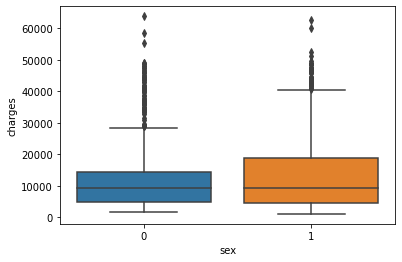

In [29]:
sns.boxplot(x="sex", y="charges", data=df)

In [30]:
from scipy import stats


In [31]:
#Let's calculate the Pearson Correlation Coefficient and P-value of 'age' and 'charges'.
pearson_coef, p_value = stats.pearsonr(df['age'], df['charges'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is 0.29900819333064765  with a P-value of P = 4.8866933317203816e-29


Conclusion:

Since the p-value is < < 0.001, the correlation between age and charges is statistically significant, although the linear relationship isn't extremely strong (~0.585)

In [32]:
#sex vs charges
#Let's calculate the Pearson Correlation Coefficient and P-value of 'sex' and 'charges'.
pearson_coef, p_value = stats.pearsonr(df['sex'], df['charges'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is 0.057292062202025346  with a P-value of P = 0.03613272100594507


Conclusion: Since p-value is <0.001 , the correlation between sex and charges is statistically significant,and the linear realtionship is quite strong (0.88),close to 1

## Binning

In [33]:
#Binning the age column.
bins = [17,35,55,1000]
slots = ['Young adult','Senior Adult','Elder']

df['Age_range']=pd.cut(df['age'],bins=bins,labels=slots)

In [34]:
df.head()

,age,sex,bmi,children,smoker,region,charges,Age_range
0,19,0,27.900,0,1,1,16884.92400,Young adult
1,18,1,33.770,1,0,0,1725.55230,Young adult
2,28,1,33.000,3,0,0,4449.46200,Young adult
3,33,1,22.705,0,0,2,21984.47061,Young adult
4,32,1,28.880,0,0,2,3866.85520,Young adult


In [35]:
# I can check the number of unique values is a column
# If the number of unique values <=40: Categorical column
# If the number of unique values in a columns> 50: Continuous

df.nunique().sort_values()

sex             2
smoker          2
Age_range       3
region          4
children        6
age            47
bmi           548
charges      1337
dtype: int64

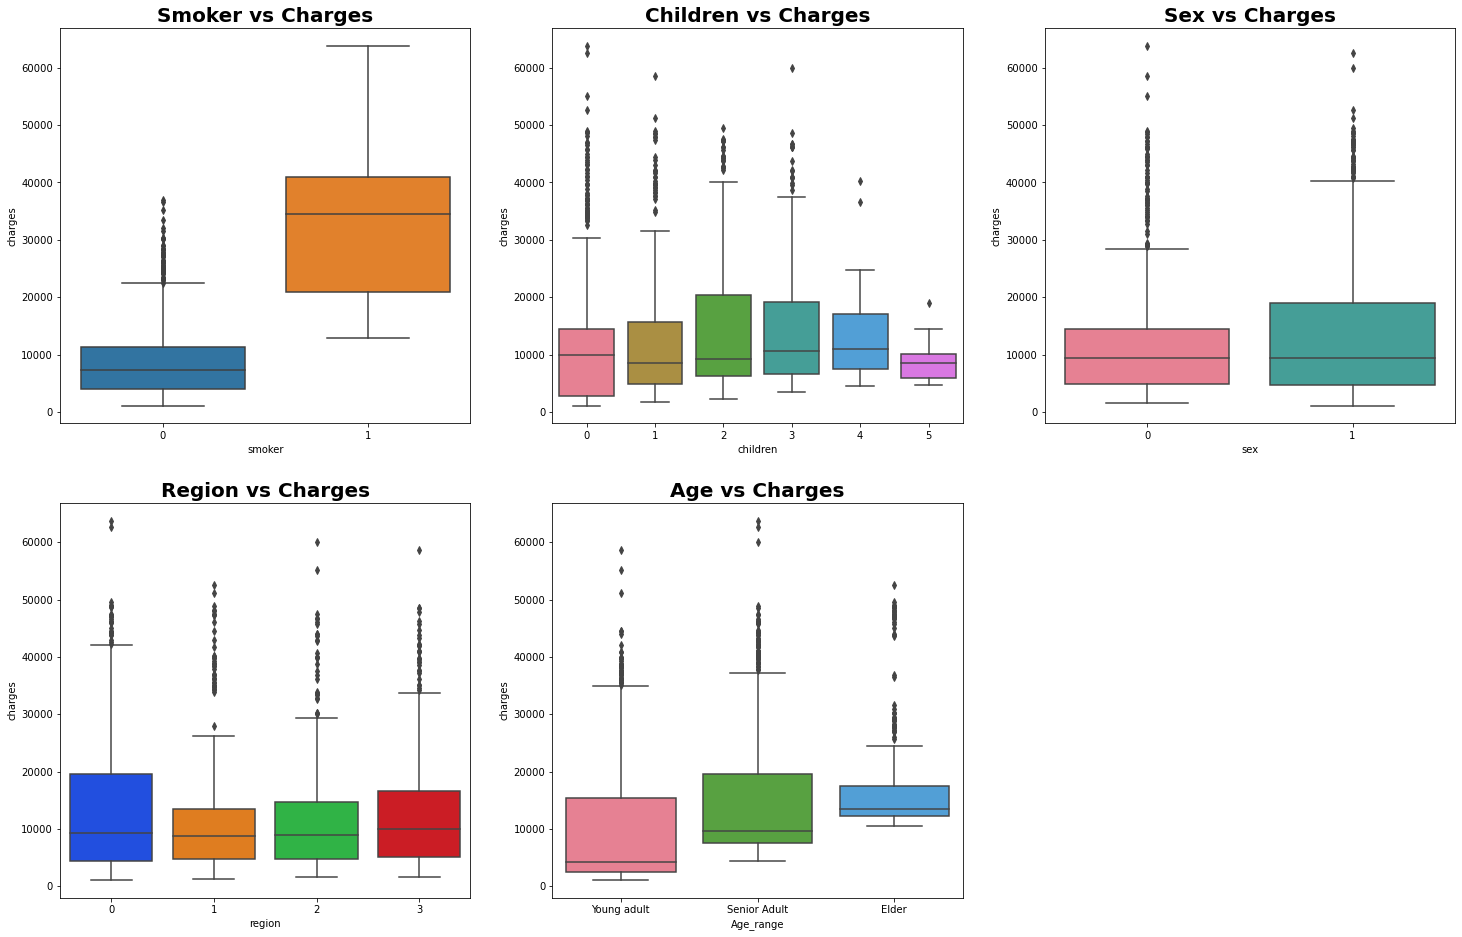

In [36]:
plt.figure(figsize=(25, 16))
plt.subplot(2,3,1)
sns.boxplot(x = 'smoker', y = 'charges', data = df)
plt.title('Smoker vs Charges',fontweight="bold", size=20)
plt.subplot(2,3,2)
sns.boxplot(x = 'children', y = 'charges', data = df,palette="husl")
plt.title('Children vs Charges',fontweight="bold", size=20)
plt.subplot(2,3,3)
sns.boxplot(x = 'sex', y = 'charges', data = df, palette= 'husl')
plt.title('Sex vs Charges',fontweight="bold", size=20)
plt.subplot(2,3,4)
sns.boxplot(x = 'region', y = 'charges', data = df,palette="bright")
plt.title('Region vs Charges',fontweight="bold", size=20)
plt.subplot(2,3,5)
sns.boxplot(x = 'Age_range', y = 'charges', data = df, palette= 'husl')
plt.title('Age vs Charges',fontweight="bold", size=20)
plt.show()

. Medical Charges are more for smoker than the non smoker.
2. Medical Charges are more in Southeast Region
3. Senior Adults are charged more

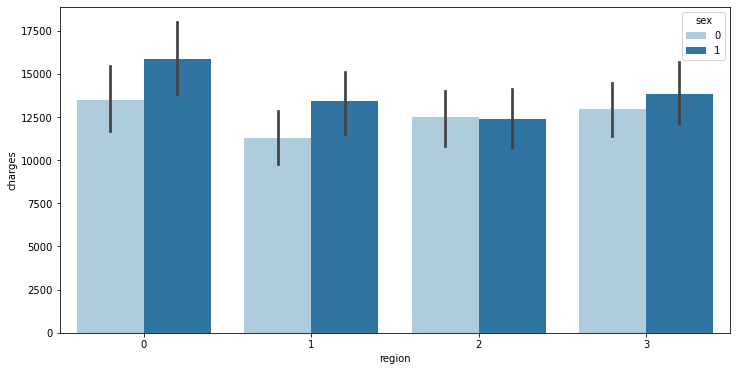

In [37]:
plt.figure(figsize=(12,6))
sns.barplot(x='region', y='charges', hue='sex', data=df, palette='Paired')
plt.show()

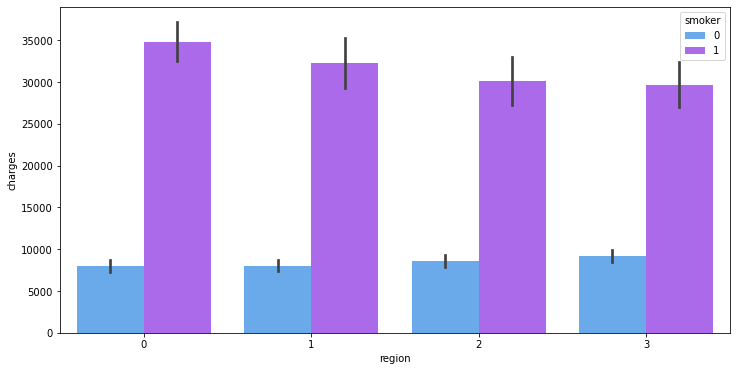

In [38]:
plt.figure(figsize=(12,6))
sns.barplot(x = 'region', y = 'charges',hue='smoker', data=df, palette='cool')
plt.show()

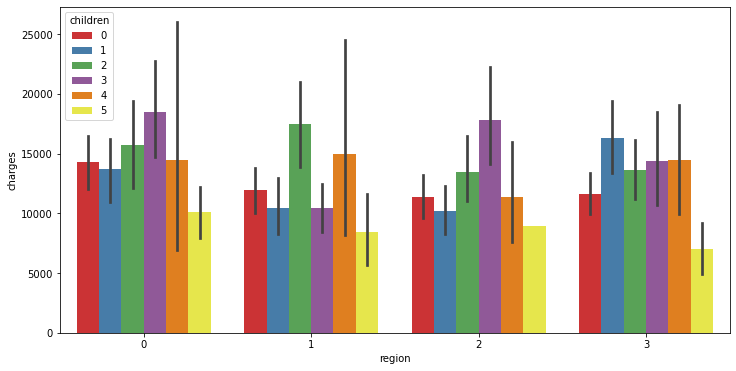

In [39]:
plt.figure(figsize=(12,6))
sns.barplot(x='region', y='charges', hue='children', data=df, palette='Set1')
plt.show()

As we can see from these barplots the highest charges due to smoking are still in the Southeast but the lowest are in the Northeast. People in the Southwest generally smoke more than people in the Northeast, but people in the Northeast have higher charges by gender than in the Southwest and Northwest overall. And people with children tend to have higher medical costs overall as well

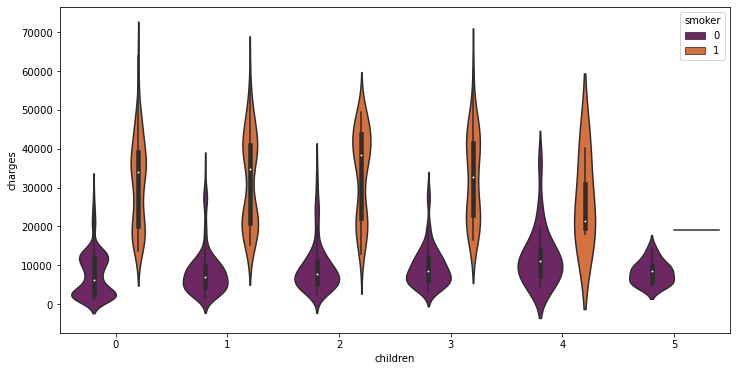

In [40]:
plt.figure(figsize=(12,6))
sns.violinplot(x = 'children', y = 'charges', data=df, hue='smoker', palette='inferno')
plt.show()

From above plot we can see that, Smoking has the highest impact on medical costs, even though the costs are growing with age, bmi and children. Also people who have children generally smoke less

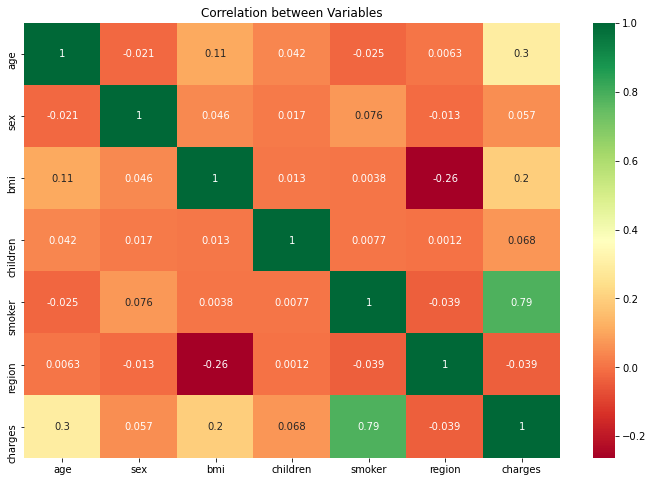

In [41]:
#Heatmap to see correlation between variables
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), cmap='RdYlGn', annot = True)
plt.title("Correlation between Variables")
plt.show()

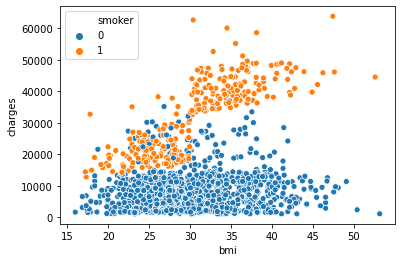

In [42]:
sns.scatterplot(x=df['bmi'], y=df['charges'], hue=df['smoker'])

The scatter plot shows that while nonsmokers do tend to pay slightly more with increasing BMI, smokers pay much more. To further emphasize this fact, I have added two regression lines, corresponding to smokers and nonsmokers

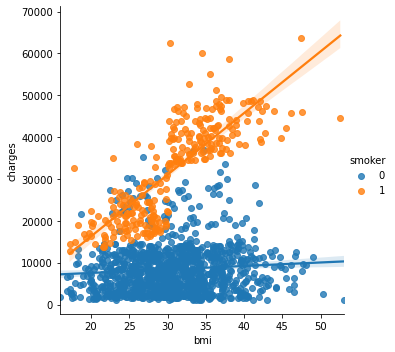

In [43]:
sns.lmplot(x="bmi", y="charges", hue="smoker", data=df)

We can notice that the regression line for smokers has a much steeper slope, relative to the line for nonsmokers. Lets conclude with categorical scatter plot.

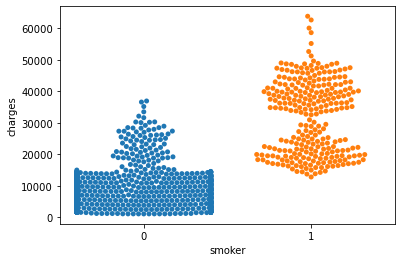

In [44]:
sns.swarmplot(x=df['smoker'],y=df['charges'])

On average, non-smokers are charged less than smokers, and the customers who pay the most are smokers whereas the customers who pay the least are non-smokers. Hence, smoking habits determine the insurance charges.

## Anova

The Analysis of Variance (ANOVA) is a statistical method used to test whether there are significant differences between the means of two or more groups. ANOVA returns two parameters:

F-test score: ANOVA assumes the means of all groups are the same, calculates how much the actual means deviate from the assumption, and reports it as the F-test score. A larger score means there is a larger difference between the means.

P-value: P-value tells how statistically significant is our calculated score value.

In [45]:
df_group_two=df_group_one[['age', 'charges']].groupby(['age'])
df_group_two.head()

,age,charges
0,18,6522.257919
1,18,7603.180557
2,19,9611.799484
3,19,9876.241479
4,20,7351.917571
...,...,...
89,62,21843.286953
90,63,22345.556404
91,63,17200.753432
92,64,23493.178700


In [46]:
df_group_two.get_group(18)['charges']
#we see the 18 years old female(0) and male(1) charges

0    6522.257919
1    7603.180557
Name: charges, dtype: float64

In [47]:
# ANOVA
f_val, p_val = stats.f_oneway(df_group_two.get_group(20)['charges'], df_group_two.get_group(40)['charges'], df_group_two.get_group(60)['charges'])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val)  

ANOVA results: F= 3.734381436008792 , P = 0.15340476086826166


## Model Development

In [48]:
from sklearn.linear_model import LinearRegression

In [49]:
lm = LinearRegression()
lm

LinearRegression()

In [50]:
X = df[['age','sex','bmi','region']]
Y = df['charges']

In [51]:
lm.fit(X,Y)

LinearRegression()

In [52]:
Yhat = lm.predict(X)
Yhat[0:5]

array([ 6754.77001986,  9755.87572333, 11933.39288244,  9824.94134672,
       11614.21262446])

In [53]:
lm.intercept_

-7078.9247593576365

In [54]:
lm.coef_

array([ 243.09457759, 1344.44303595,  329.12807374,   32.22454774])

(0.0, 66902.8557155)

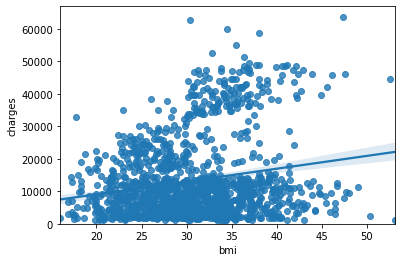

In [55]:
width = 6
height = 4
plt.figure(figsize=(width, height))
sns.regplot(x="bmi", y="charges", data=df)
plt.ylim(0,)

# Training and Testing

In [56]:
y_data = df['charges']

In [57]:
x_data =df.drop('charges',axis =1)

In [58]:
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.15, random_state=1)


print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples : 201
number of training samples: 1137


In [59]:
#Use the function "train_test_split" to split up the data set such that 40% of the data samples will be utilized for testing, set the parameter "random_state" equal to zero. The output of the function should be the following: "x_train_1" , "x_test_1", "y_train_1" and "y_test_1".

In [60]:

x_train1, x_test1, y_train1, y_test1 = train_test_split(x_data, y_data, test_size=0.4, random_state=0) 
print("number of test samples :", x_test1.shape[0])
print("number of training samples:",x_train1.shape[0])

number of test samples : 536
number of training samples: 802


In [61]:
from sklearn.linear_model import LinearRegression

In [62]:
lre=LinearRegression()  

In [63]:
lre.fit(x_train[['bmi']], y_train)   # we fit the model using the feature bmi

LinearRegression()

In [64]:
lre.score(x_test[['bmi']], y_test)   # claculates th R^2 on the test data

0.062044406628804616

In [65]:
lre.score(x_train[['bmi']], y_train)  # we can see the R^2 is much smaller using the test data

0.03535575236797206

In [66]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_data, y_data, test_size=0.1, random_state=0)
lre.fit(x_train1[['bmi']],y_train1)
lre.score(x_test1[['bmi']],y_test1)

0.04477117282077592